In [171]:
import numpy as np
from itertools import combinations
import copy
import random

In [172]:
from collections import deque
from matplotlib import pyplot as plt
import Field
import Game
import Agent
import Cards
from utils import * 
from importlib import reload
from random import choice, shuffle

reload(Field)
reload(Game)
reload(Agent)
reload(Cards)

<module 'Cards' from '/home/clark/Apps/durakula/game/Cards.py'>

# Testing Cards functionality
## Card Class

In [137]:
print('Card Class - test 1\n')
s=3
v=5
a_card = Cards.Card(s,v)
print(a_card)
print(a_card.suit, a_card.value)
print(a_card.suit_idx, a_card.value_idx)
print(Cards._CARD_MAP_FULL[s,v])

Card Class - test 1

7 of Spades
Spades 7
3 5
S5


In [138]:
print('Card Class - test 2\n')
all_cards = [Cards.Card(s,v) for s in range(4) for v in range(13)]
print(all_cards)
print([str(card) for card in all_cards])

Card Class - test 2

[D0, D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D11, D12, C0, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, H0, H1, H2, H3, H4, H5, H6, H7, H8, H9, H10, H11, H12, S0, S1, S2, S3, S4, S5, S6, S7, S8, S9, S10, S11, S12]
['2 of Diamonds', '3 of Diamonds', '4 of Diamonds', '5 of Diamonds', '6 of Diamonds', '7 of Diamonds', '8 of Diamonds', '9 of Diamonds', '10 of Diamonds', 'Jack of Diamonds', 'Queen of Diamonds', 'King of Diamonds', 'Ace of Diamonds', '2 of Clubs', '3 of Clubs', '4 of Clubs', '5 of Clubs', '6 of Clubs', '7 of Clubs', '8 of Clubs', '9 of Clubs', '10 of Clubs', 'Jack of Clubs', 'Queen of Clubs', 'King of Clubs', 'Ace of Clubs', '2 of Hearts', '3 of Hearts', '4 of Hearts', '5 of Hearts', '6 of Hearts', '7 of Hearts', '8 of Hearts', '9 of Hearts', '10 of Hearts', 'Jack of Hearts', 'Queen of Hearts', 'King of Hearts', 'Ace of Hearts', '2 of Spades', '3 of Spades', '4 of Spades', '5 of Spades', '6 of Spades', '7 of Spades', '8 of Spades', '9 of Spades', 

## CardCollection class

In [139]:
print('CardCollection - test 1\n')
print('Create a full deck A\n')
a_deck = Cards.CardCollection()
print('A', a_deck)
print(a_deck.cards)

b_deck = copy.copy(a_deck)
c_deck = copy.deepcopy(a_deck)
print('\nCreate B = copy.copy(A)')
print('Create C = copy.deepcopy(A)\n')

print('-----------Shuffling A -------------\n')
shuffle(a_deck)

print('A', a_deck)
print(a_deck.cards)
print('\n')

print('B == A: ', b_deck == a_deck)
print('------------------------')
print('B', b_deck)

print('C == A: ', c_deck == a_deck)
print('C', c_deck)

CardCollection - test 1

Create a full deck A

A --- Card Collection ---
Cards: D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12.
Size: 52
-----------------------

[[1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]]

Create B = copy.copy(A)
Create C = copy.deepcopy(A)

-----------Shuffling A -------------

A --- Card Collection ---
Cards: H12,C9,H10,D6,H8,S12,H9,S2,C12,H3,S11,C5,C3,C0,S10,D0,S4,S6,S5,C8,D4,H6,D10,D1,D2,H0,S3,H4,D3,C1,C2,S0,C4,C6,H11,H5,C10,D5,H2,S7,H7,S9,S8,C11,C7,D7,D8,D9,S1,D12,D11,H1.
Size: 52
-----------------------

[[1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]]


B == A:  True
------------------------
B --- Card Collection ---
Cards: H12,C9,H10,D6,H8,S12,H9,S2,C12,H3,S11,C5,C3,C0,S10,D0,S4,S6,S5,C8,D4,H6,D10,D1,D2

In [140]:
print('CardCollection - test 2\n')

print('Create full deck A\n')
a_deck = Cards.CardCollection(4,9)
b_deck = copy.deepcopy(a_deck)
b_deck.empty()
shuffle(a_deck)
print('A', a_deck)

print('Create B -- a copy of A which is then emptied\n')
print('B', b_deck)

print('Draw 1 card from A, add to B\n')
b_deck = a_deck.draw_card(1)
print('A', a_deck)
print('B', b_deck)

print('Draw another card from A, add to B\n')
b_deck += a_deck.draw_card(1)

print('A', a_deck)
print('B', b_deck)

print('Draw 60 cards from A, add to B\n')
b_deck += a_deck.draw_card(60)

print('A', a_deck)
print('B', b_deck)
print('A.cards\n', a_deck.cards)
print('B.cards\n', b_deck.cards)

CardCollection - test 2

Create full deck A

A --- Card Collection ---
Cards: D4,C7,S2,H7,S6,D1,S1,S7,H1,S5,H2,C6,C0,H5,C4,C5,S3,H4,D0,C3,C1,S8,D6,D2,C2,H3,D8,C8,H6,D7,H0,D3,S4,H8,S0,D5.
Size: 36
-----------------------

Create B -- a copy of A which is then emptied

B --- Card Collection ---
Cards: .
Size: 0
-----------------------

Draw 1 card from A, add to B

A --- Card Collection ---
Cards: C7,S2,H7,S6,D1,S1,S7,H1,S5,H2,C6,C0,H5,C4,C5,S3,H4,D0,C3,C1,S8,D6,D2,C2,H3,D8,C8,H6,D7,H0,D3,S4,H8,S0,D5.
Size: 35
-----------------------

B --- Card Collection ---
Cards: D4.
Size: 1
-----------------------

Draw another card from A, add to B

A --- Card Collection ---
Cards: S2,H7,S6,D1,S1,S7,H1,S5,H2,C6,C0,H5,C4,C5,S3,H4,D0,C3,C1,S8,D6,D2,C2,H3,D8,C8,H6,D7,H0,D3,S4,H8,S0,D5.
Size: 34
-----------------------

B --- Card Collection ---
Cards: C7,D4.
Size: 2
-----------------------

Draw 60 cards from A, add to B

A --- Card Collection ---
Cards: .
Size: 0
-----------------------

B --- Card C

In [141]:
print('CardCollection test 3\n')
print('Draw from an empty deck\n')
a_deck = Cards.CardCollection()
a_deck.empty()
b_deck = a_deck.draw_card(3)

print('A:', a_deck)
print('B:', b_deck)

CardCollection test 3

Draw from an empty deck

A: --- Card Collection ---
Cards: .
Size: 0
-----------------------

B: --- Card Collection ---
Cards: .
Size: 0
-----------------------



## DurakDeck Class

In [154]:
print('DurakDeck: test 1\n')

small_deck = Cards.DurakDeck(mode='small')
full_deck = Cards.DurakDeck(mode='full')

a_deck = Cards.DurakDeck()
b_deck = a_deck.draw_card(12)
set_deck = Cards.DurakDeck(cards=b_deck.cards)

print('Create a deck in small mode\n')
print(small_deck)

print('Create a deck in full mode\n')
print(full_deck)

print('Create a deck in with preset cards\n')
print(set_deck)

DurakDeck: test 1

Create a deck in small mode

--- Card Collection ---
Cards: D0,D1,D2,D3,D4,D5,D6,D7,D8,C0,C1,C2,C3,C4,C5,C6,C7,C8,H0,H1,H2,H3,H4,H5,H6,H7,H8,S0,S1,S2,S3,S4,S5,S6,S7,S8.
Size: 36
-----------------------

Create a deck in full mode

--- Card Collection ---
Cards: D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12.
Size: 52
-----------------------

Create a deck in with preset cards

--- Card Collection ---
Cards: D0,D1,D2,D3,D4,D5,D6,D7,D8,C0,C1,C2.
Size: 12
-----------------------



In [143]:
print('DurakDeck: test 2\n')
small_deck = Cards.DurakDeck(mode='small')
print('Draw 1 card from small deck.\n')
small_deck.draw_card(1)
print(small_deck)

print('Draw 2 cards from above small deck.\n')
small_deck.draw_card(2)
print(small_deck)

print('Draw 6 cards from above small deck.\n')
small_deck.draw_card(6)
print(small_deck)

print('Draw 50 cards from above small deck.\n')
small_deck.draw_card(50)
print(small_deck)

DurakDeck: test 2

Draw 1 card from small deck.

--- Card Collection ---
Cards: D1,D2,D3,D4,D5,D6,D7,D8,C0,C1,C2,C3,C4,C5,C6,C7,C8,H0,H1,H2,H3,H4,H5,H6,H7,H8,S0,S1,S2,S3,S4,S5,S6,S7,S8.
Size: 35
-----------------------

Draw 2 cards from above small deck.

--- Card Collection ---
Cards: D3,D4,D5,D6,D7,D8,C0,C1,C2,C3,C4,C5,C6,C7,C8,H0,H1,H2,H3,H4,H5,H6,H7,H8,S0,S1,S2,S3,S4,S5,S6,S7,S8.
Size: 33
-----------------------

Draw 6 cards from above small deck.

--- Card Collection ---
Cards: C0,C1,C2,C3,C4,C5,C6,C7,C8,H0,H1,H2,H3,H4,H5,H6,H7,H8,S0,S1,S2,S3,S4,S5,S6,S7,S8.
Size: 27
-----------------------

Draw 50 cards from above small deck.

--- Card Collection ---
Cards: .
Size: 0
-----------------------



## DurakHand Class

In [173]:
print('DurakHand test 1\n')
print('Testing __init__\n')
small_deck = Cards.DurakDeck()
a_hand = Cards.DurakHand(small_deck)
print(a_hand)
print(a_hand.hand)
print('trump suit: ', a_hand.trump_suit)
print(small_deck)

DurakHand test 1

Testing __init__

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0]]
trump suit:  Spades
--- Card Collection ---
Cards: D6,D7,D8,C0,C1,C2,C3,C4,C5,C6,C7,C8,H0,H1,H2,H3,H4,H5,H6,H7,H8,S0,S1,S2,S3,S4,S5,S6,S7,S8.
Size: 30
-----------------------



In [174]:
print('DurakHand test 2\n')
print('Create a hand from an empty deck\n')
empty_deck = small_deck.draw_card(0)
a_hand = Cards.DurakHand(empty_deck)
print(a_hand)
print(a_hand.hand)
print('trump suit: ', a_hand.trump_suit)
print(a_hand.get_deck_from_hand())

DurakHand test 2

Create a hand from an empty deck



ValueError: Attempted to create hand from an empty deck

In [175]:
print('DurakHand test 2\n')
small_deck = Cards.DurakDeck()
a_hand = Cards.DurakHand(small_deck)
print(a_hand)
print(a_hand.hand)
print(small_deck)
print(a_hand.get_deck_from_hand())

DurakHand test 2

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0]]
--- Card Collection ---
Cards: D6,D7,D8,C0,C1,C2,C3,C4,C5,C6,C7,C8,H0,H1,H2,H3,H4,H5,H6,H7,H8,S0,S1,S2,S3,S4,S5,S6,S7,S8.
Size: 30
-----------------------

--- Card Collection ---
Cards: D0,D1,D2,D3,D4,D5.
Size: 6
-----------------------



In [176]:
print('DurakHand test 3\n')
a_hand.get_hand_from_deck(small_deck.draw_card(10))
print(a_hand.hand)
print(a_hand.get_deck_from_hand())

DurakHand test 3

[[0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1]]
--- Card Collection ---
Cards: D0,D1,D2,D3,D4,D5,D6,D7,D8,C0,C1,C2,C3,C4,C5,C6.
Size: 16
-----------------------



# Testing Game Functionality

In [44]:
numplayers = 5
durak_game = Game.DurakGame(numplayers, 'full')

In [45]:
print(durak_game.playing_field)

--- Playing Field ---
Drawing DurakDeck: --- Card Collection ---
Cards: S4,H3,H7,H10,D1,H12,D3,S10,S1,D8,S11,C5,C1,H11,H8,D4,C11,H9,D10,S0,C2,H0.
Size: 22
-----------------------

0:--- Card Collection ---
Cards: D2,C0,H1,H6,S2,S3.
Size: 6
-----------------------

1:--- Card Collection ---
Cards: C3,C8,H5,S6,S8,S12.
Size: 6
-----------------------

2:--- Card Collection ---
Cards: D9,D11,D12,C6,C10,H2.
Size: 6
-----------------------

3:--- Card Collection ---
Cards: D0,D5,H4,S5,S7,S9.
Size: 6
-----------------------

4:--- Card Collection ---
Cards: D6,D7,C4,C7,C9,C12.
Size: 6
-----------------------

Trump suit is Hearts
---------------------



In [180]:
durak_game.playing_field.first_attack

True

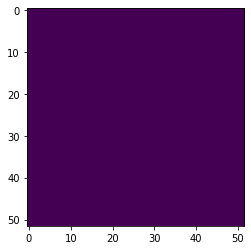

In [181]:
plt.imshow(durak_game.playing_field.field)

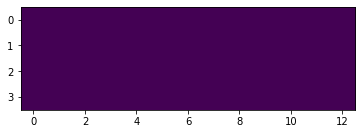

In [182]:
plt.imshow(durak_game.playing_field.attack_buffer)

In [183]:
players_on_attack = [p.player_id for p in durak_game.playing_field.players_in_attack()]
p_att_idx = players_on_attack[0]
print(durak_game.players[p_att_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D6,D7,C4,C7,C9,C12.
Size: 6
-----------------------



In [184]:
p_def_idx = durak_game.playing_field.player_in_defense().player_id
print(durak_game.players[p_def_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D2,C0,H1,H6,S2,S3.
Size: 6
-----------------------



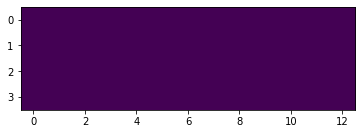

In [185]:
plt.imshow(durak_game.players[p_def_idx].buffer)

In [186]:
attack_moves = durak_game.playing_field.get_legal_moves(p_att_idx)
attack_moves

[((1, 4),),
 ((1, 7),),
 ((1, 9),),
 ((1, 12),),
 ((2, 6),),
 ((2, 7),),
 ((1, 7), (2, 7))]

In [187]:
random_move = choice(durak_game.playing_field.get_legal_moves(p_att_idx))
print(random_move)

((2, 7),)


In [188]:
durak_game.get_next_state(random_move, p_att_idx)

(<Field.DurakField at 0x7f43c9d3f0d0>, 0)

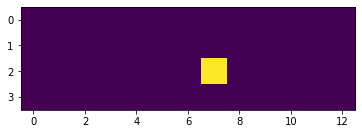

In [189]:
plt.imshow(durak_game.playing_field.attacks)

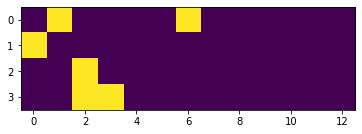

In [190]:
plt.imshow(durak_game.players[p_def_idx].hand)

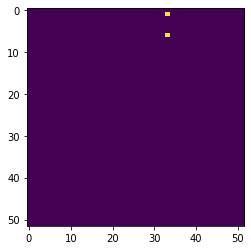

In [191]:
player = durak_game.players[p_def_idx]
attack_idxs = np.flatnonzero(durak_game.playing_field.attacks)
n_vals = durak_game.playing_field.n_vals
n_suits = durak_game.playing_field.n_suits
nontrump_attack_idxs = attack_idxs[attack_idxs >= n_vals]
valid_defenses = np.zeros_like(durak_game.playing_field.field)
f = lambda x : (x // n_vals + 1)*n_vals

for att_idx in attack_idxs:
    valid_defenses[att_idx + 1 : f(att_idx), att_idx] = 1
for att_idx in nontrump_attack_idxs:
    valid_defenses[:n_vals, att_idx] = 1
    
if durak_game.playing_field.first_attack:
    valid_defenses[att_idx % n_vals : att_idx % n_vals + n_suits*n_vals : n_vals, att_idx] = 1

valid_defenses *= player.hand.ravel()[:,np.newaxis]
plt.imshow(valid_defenses)

In [192]:
defend_actions = durak_game.playing_field.get_legal_moves(p_def_idx)
print(defend_actions)

['ACTION_GIVEUP', ((1, 33),), ((6, 33),)]


In [193]:
random_defend = choice(defend_actions)
print(random_defend)
# random_defend = 'ACTION_GIVEUP'

((6, 33),)


In [194]:
durak_game.players[p_def_idx].buffer

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

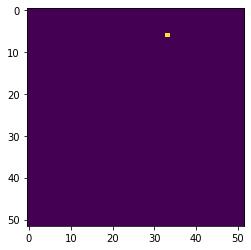

In [195]:
durak_game.get_next_state(random_defend, p_def_idx)
plt.imshow(durak_game.playing_field.field)

In [196]:
for p in durak_game.players:
    print(p.player_mode)

MODE_DEFEND
MODE_ATTACK
MODE_ATTACK
MODE_ATTACK
MODE_ATTACK


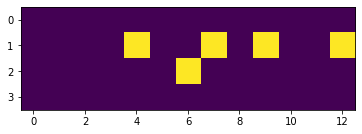

In [197]:
plt.imshow(durak_game.players[p_att_idx].hand)

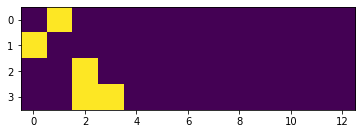

In [198]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [199]:
durak_game.playing_field.field_active

True